<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [42]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [43]:
#Importation du fichier population.csv
population = pd.read_csv(r'C:\Quynh\Projet 4\population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv(r'C:\Quynh\Projet 4\dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv(r'C:\Quynh\Projet 4\aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition= pd.read_csv(r'C:\Quynh\Projet 4\sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [44]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [45]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [46]:
#Affichage les 5 premières lignes de la table
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [47]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Valeur']= population['Valeur']*1000

In [48]:
#changement du nom de la colonne Valeur par Population
population.rename(columns={'Valeur':'Population'},inplace=True)

In [49]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head(5)

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [50]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne (s)".format (dispo_alimentaire.shape [1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne (s)


In [51]:
#Consulter le nombre de colonnes
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [52]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [53]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire= dispo_alimentaire.fillna(0)

In [54]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
#refaire avec loop: for
colonne= ['Aliments pour animaux','Autres Utilisations','Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production','Semences', 'Traitement', 'Variation de stock']
for x in colonne:
    dispo_alimentaire[x] = dispo_alimentaire[x]* 1000

In [55]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [56]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation (s) ou article (s)".format (aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonnes (s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation (s) ou article (s)
Le tableau comporte 4 colonnes (s)


In [57]:
#Consulter le nombre de colonnes
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [58]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [59]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'}, inplace=True)

In [60]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur']= aide_alimentaire['Valeur']*1000

In [61]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [62]:
#Afficher les dimensions du dataset
print('Le tableau comporte {} observation(s) ou artile(s)'.format(sous_nutrition.shape[0]))
print('Le tableau comporte {} colonne(s)'.format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou artile(s)
Le tableau comporte 3 colonne(s)


In [63]:
#Consulter le nombre de colonnes
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [64]:
sous_nutrition.head()
sous_nutrition

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,NaN
1214,Zimbabwe,2014-2016,NaN
1215,Zimbabwe,2015-2017,NaN
1216,Zimbabwe,2016-2018,NaN


In [65]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [66]:
#Conversion de la colonne sous nutrition en numérique
sous_nutrition['valuer'] = pd.to_numeric(sous_nutrition['valuer'])                                                    

KeyError: 'valuer'

In [67]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['valuer']= pd.to_numeric(sous_nutrition['valuer'],errors='coerce')
sous_nutrition= sous_nutrition.fillna(0)

KeyError: 'valuer'

In [68]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition.rename(columns={'Valeur':'sous_nutrition'},inplace=True)

In [69]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition['sous_nutrition']= sous_nutrition['sous_nutrition']*1000000

In [70]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.68.68.68.68.68.68.68.68.68.68.68.68.68.68.68...
1,Afghanistan,2013-2015,8.88.88.88.88.88.88.88.88.88.88.88.88.88.88.88...
2,Afghanistan,2014-2016,8.98.98.98.98.98.98.98.98.98.98.98.98.98.98.98...
3,Afghanistan,2015-2017,9.79.79.79.79.79.79.79.79.79.79.79.79.79.79.79...
4,Afghanistan,2016-2018,10.510.510.510.510.510.510.510.510.510.510.510...


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [71]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
population['Année'].unique()
population_2017= population[population['Année']== 2017]
nutrition_2017= sous_nutrition[sous_nutrition['Année']== '2016-2018']
data=pd.merge(population_2017,nutrition_2017,on='Zone')

In [72]:
#Affichage du dataset
data.head()
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Zone            203 non-null    object 
 1   Année_x         203 non-null    int64  
 2   Population      203 non-null    float64
 3   Année_y         203 non-null    object 
 4   sous_nutrition  104 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.1+ KB


,Zone,Année_x,Population,Année_y,sous_nutrition
0,Afghanistan,2017,36296113.0,2016-2018,10.510.510.510.510.510.510.510.510.510.510.510...
1,Afrique du Sud,2017,57009756.0,2016-2018,3.13.13.13.13.13.13.13.13.13.13.13.13.13.13.13...
2,Albanie,2017,2884169.0,2016-2018,0.10.10.10.10.10.10.10.10.10.10.10.10.10.10.10...
3,Algérie,2017,41389189.0,2016-2018,1.31.31.31.31.31.31.31.31.31.31.31.31.31.31.31...
4,Allemagne,2017,82658409.0,2016-2018,NaN
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402484.0,2016-2018,8888888888888888888888888888888888888888888888...
199,Viet Nam,2017,94600648.0,2016-2018,6.56.56.56.56.56.56.56.56.56.56.56.56.56.56.56...
200,Yémen,2017,27834819.0,2016-2018,NaN
201,Zambie,2017,16853599.0,2016-2018,NaN


In [73]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
proportion= round(data['sous_nutrition'].sum()/data['Population'].sum()*100,2)
print ('Proportion de personnes en sous nutrition {} %'.format(proportion))


TypeError: can only concatenate str (not "int") to str

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [ ]:
#Combien mange en moyenne un être humain ? Source => https://toutpourmasante.fr/combien-calories-par-jour/ 2300kcal/jour

In [ ]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
population_dispo= pd.merge(dispo_alimentaire,population_2017, on= 'Zone',how='left')
population_dispo.info()

In [ ]:
#Affichage du nouveau dataframe
population_dispo.head()

In [ ]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement par jour
population_dispo['dispo_kcal'] = population_dispo['Disponibilité alimentaire (Kcal/personne/jour)'] * population_dispo['Population']*365 
population_dispo

In [ ]:
total_dispo_kcal=population_dispo['dispo_kcal'].sum()
print('Dispo alimentaire totale en kcal {}'.format(total_dispo_kcal))


In [ ]:
population= population_2017['Population'].sum() 
print('Population en 2017:',population)

In [74]:
# Calcul du nombre total d'êtres humains qui pourraient être nourris
nombre_humain = round(total_dispo_kcal / (2300*365),0)
print('La total d\'êtres humains qui pourraient être nourris {}'.format(nombre_humain))


NameError: name 'total_dispo_kcal' is not defined

In [75]:
# Calcul de la proportion d'humains qui pourraient être nourris par rapport à la population totale
proportion_humains = round(nombre_humain/population*100, 2)

# Affichage correct de la proportion d'humains qui pourraient être nourris
print('La proportion d\'humains pouvant être nourris est de {} %'.format(proportion_humains))


NameError: name 'nombre_humain' is not defined

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [76]:
#Transfert des données avec les végétaux dans un nouveau dataframe
dispo_vegetale= population_dispo[population_dispo['Origine']=='vegetale']

NameError: name 'population_dispo' is not defined

In [77]:
#Calcul du nombre de kcal disponible pour les végétaux
dispo_vegetaux=dispo_vegetale['dispo_kcal'].sum()
print('Du nombre de kcal disponible pour les végétaux: {} kcal'.format(dispo_vegetaux))

NameError: name 'dispo_vegetale' is not defined

In [78]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nombre_humain_vegetale= round(dispo_vegetaux/(2300*365))
print ('Du nombre d\'humains pouvant être nourris avec les végétaux:',nombre_humain_vegetale)

NameError: name 'dispo_vegetaux' is not defined

In [79]:
# La proportion d'humains pouvant être nourris avec les végétaux
proportion_humains_vegetaux= round(nombre_humain_vegetale*100/population,2)
print('Le proportion d\'humains pouvant d\'etre nourris avec les végétaux {} %'.format(proportion_humains_vegetaux))

NameError: name 'nombre_humain_vegetale' is not defined

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [80]:
#Calcul de la disponibilité totale/Donner la part de l’alimentation humaine, animale et perdue (est-ce qu’on peut aussi calculer les autres ?) 
#=> Graphique ?
#Equation 
#Production + Importations - Exportations + Variation de stock=Disponibilité intérieure=Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations
la_disponibilité_totale= dispo_alimentaire['Disponibilité intérieure'].sum()
la_disponibilité_totale
propotion_semences=round(dispo_alimentaire['Semences'].sum()/dispo_alimentaire['Disponibilité intérieure']*100,2)

In [81]:
columns = ['Semences', 'Pertes', 'Nourriture', 'Aliments pour animaux', 'Traitement', 'Autres Utilisations']
#Crée data frame:
data_dispo= []

for column in columns:
    part = dispo_alimentaire[column].sum()  # Sum for the current column
    proportion = round(part / la_disponibilité_totale * 100, 2)  # Calculate the proportion
    #Append the data as a dictionary to the list
    data_dispo.append({'Colonnes': column, 'part':part,'proportion_dispo':proportion})
    #Create the DataFrame from the list of dictionaries
    df= pd.DataFrame(data_dispo)
print (df)


                Colonnes          part  proportion_dispo
0               Semences  1.546810e+08              1.57
1                 Pertes  4.536980e+08              4.61
2             Nourriture  4.876258e+09             49.51
3  Aliments pour animaux  1.304245e+09             13.24
4             Traitement  2.204687e+09             22.38
5    Autres Utilisations  8.650230e+08              8.78


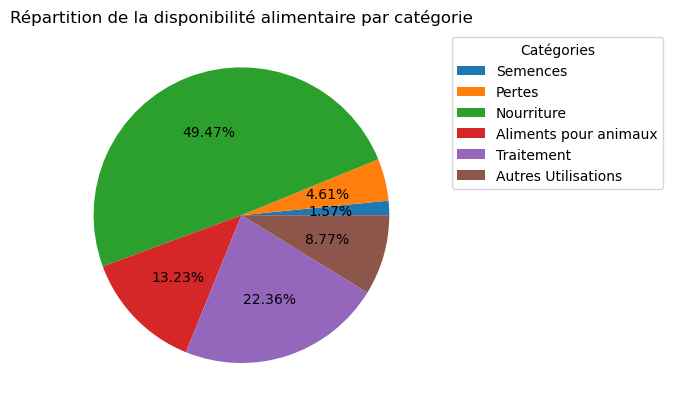

In [82]:

plt.pie(x=df['proportion_dispo'],autopct='%.2f%%')
plt.title('Répartition de la disponibilité alimentaire par catégorie')
plt.legend(df['Colonnes'],title="Catégories",bbox_to_anchor=(1.05, 1))
plt.show()

Ce graphique circulaire illustre la répartition de la disponibilité alimentaire par catégorie. La majorité, 49,47%, est consacrée à la nourriture pour les humains, tandis que les aliments pour animaux et autres utilisations représentent 13,23% et 8,77% respectivement.

Les pertes s'élèvent à 4,61% suggère qu'il y a un potentiel d'amélioration dans la gestion des ressources, car réduire ce chiffre pourrait augmenter la disponibilité de nourriture pour l'humain ou pour d'autres usages. 

Le faible pourcentage pour les semences à 1,57% peut refléter un niveau élevé d'efficacité dans ce domaine ou une possible sous-investissement qui pourrait limiter la production future.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [48]:
#Création d'une liste avec toutes les variables
produit= dispo_alimentaire['Produit'].unique()
produit

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [49]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
produit_céréale= ['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres']
dispo_céréale= dispo_alimentaire[dispo_alimentaire['Produit'].isin(produit_céréale)]
dispo_céréale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5992000.0,0.0,1173000.0,4895000.0,775000.0,5169000.0,322000.0,0.0,-350000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000.0,0.0,21.0,2.50,0.30,0.56,313000.0,0.0,1000.0,76000.0,31000.0,312000.0,5000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,13000.0,0.0,0.0,12000.0,1000.0,13000.0,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000.0,0.0,26.0,2.92,0.24,0.79,524000.0,0.0,10000.0,89000.0,52000.0,514000.0,22000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1000.0,0.0,1000.0,0.0,0.0,0.0,0.0,1000.0,0.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000.0,623.0,63.76,1.36,10.90,49000.0,0.0,47000.0,36000.0,1000.0,3000.0,0.0,0.0,0.0


In [50]:
columns = ['Semences', 'Pertes', 'Nourriture', 'Aliments pour animaux', 'Traitement']
#Crée data frame:
data_35= []

for column in columns:
    part = dispo_céréale[column].sum()  # Sum for the current column
    proportion = round(part / dispo_céréale['Disponibilité intérieure'].sum() * 100, 2)  # Calculate the proportion
    #Append the data as a dictionary to the list
    data_35.append({'Colonnes': column, 'part':part,'proportion_dispo':proportion})
    #Create the DataFrame from the list of dictionaries
    utilisation_céréales= pd.DataFrame(data_35)
print (utilisation_céréales)

                Colonnes          part  proportion_dispo
0               Semences  6.853800e+07              2.85
1                 Pertes  1.071200e+08              4.45
2             Nourriture  1.029010e+09             42.75
3  Aliments pour animaux  8.735350e+08             36.29
4             Traitement  9.458900e+07              3.93


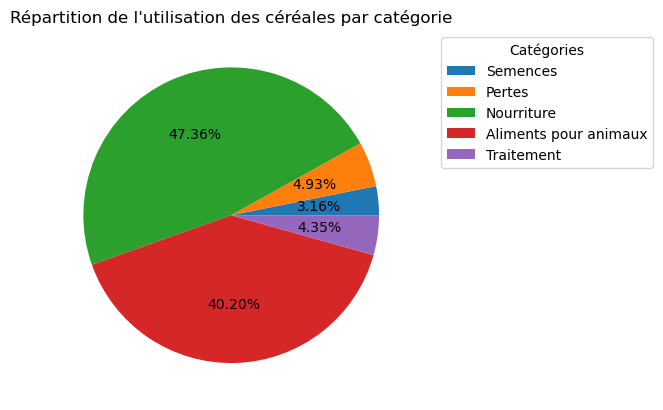

In [51]:
plt.pie(x=utilisation_céréales['proportion_dispo'],autopct='%.2f%%')
plt.title('Répartition de l\'utilisation des céréales par catégorie')
plt.legend(utilisation_céréales['Colonnes'],title="Catégories",bbox_to_anchor=(1.05, 1))
plt.show()

Le graphique montre que la plus grande partie des céréales est destinée à la nourriture (47,36%) et à l'alimentation animale (40.20%), reflétant leur rôle central dans l'alimentation humaine et animale. 

Les pertes représentent 4,93%, soulignant une marge d'amélioration dans l'efficacité de l'utilisation. 

Les semences (3.16%) et le traitement (4,35%) constituent une part plus petite, indiquant une efficacité élevée dans ces processus où un faible volume de céréales est nécessaire pour produire ce qui est requis pour la saison de plantation suivante et pour le traitement industriel.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [52]:
#Création de la colonne proportion par pays
data['proportion']= round(data['sous_nutrition']/data['Population']*100,2)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Zone            203 non-null    object 
 1   Année_x         203 non-null    int64  
 2   Population      203 non-null    float64
 3   Année_y         203 non-null    object 
 4   sous_nutrition  203 non-null    float64
 5   proportion      203 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 9.6+ KB


In [53]:
#affichage après trie des 10 pires pays
pays_sous_alimentaire=data.sort_values('proportion',ascending=False)
pays_sous_alimentaire.head(10)

,Zone,Année_x,Population,Année_y,sous_nutrition,proportion
78,Haïti,2017,10982366.0,2016-2018,5300000.0,48.26
157,République populaire démocratique de Corée,2017,25429825.0,2016-2018,12000000.0,47.19
108,Madagascar,2017,25570512.0,2016-2018,10500000.0,41.06
103,Libéria,2017,4702226.0,2016-2018,1800000.0,38.28
100,Lesotho,2017,2091534.0,2016-2018,800000.0,38.25
183,Tchad,2017,15016753.0,2016-2018,5700000.0,37.96
161,Rwanda,2017,11980961.0,2016-2018,4200000.0,35.06
121,Mozambique,2017,28649018.0,2016-2018,9400000.0,32.81
186,Timor-Leste,2017,1243258.0,2016-2018,400000.0,32.17
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0,28.93


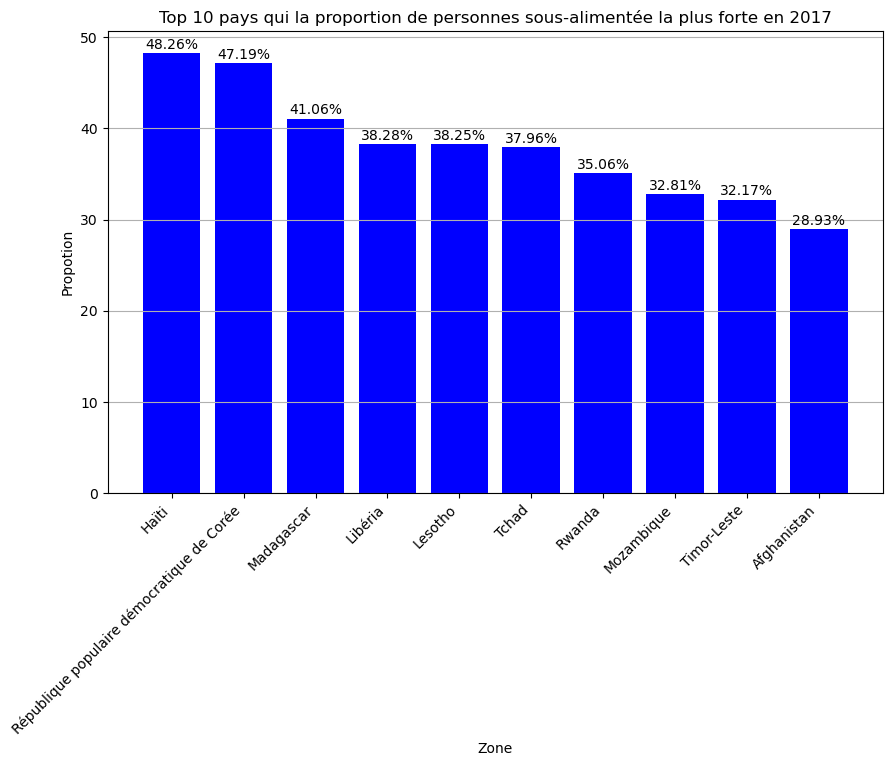

In [54]:
data_36=pays_sous_alimentaire.head(10)

plt.figure(figsize=(10, 6))
plt.bar(data_36['Zone'], data_36['proportion'],color='Blue')
plt.xlabel('Zone')
plt.ylabel('Propotion')
plt.grid(axis='y')

# Utilisation correcte de plt.yticks pour définir les positions

plt.title("Top 10 pays qui la proportion de personnes sous-alimentée la plus forte en 2017")
plt.xticks(rotation=45, ha='right')

# Définition de la liste des valeurs (vérifiez que cette ligne existe et est correcte).
x = data_36['proportion'].tolist()

# Création des annotations pour chaque barre.
for i in range (len(x)):
    plt.text(i, x[i] + 0.5, f'{x[i]:.2f}%', ha='center')
plt.show()


Ce graphique à barres montre les taux de sous-alimentation dans divers pays en 2017, avec Haïti et la République populaire démocratique de Corée en tête, affichant les proportions les plus élevées, au-delà de 47%. 

Les autres pays, y compris Madagascar et le Liberia, présentent également des taux élevés, plus de 37%. Ces données suggèrent que ces pays étaient confrontés à d'importants défis en matière de sécurité alimentaire cette année-là.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [55]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire_pays= aide_alimentaire.groupby('Zone')['Valeur'].sum().reset_index()
aide_alimentaire_pays= aide_alimentaire_pays.sort_values('Valeur', ascending= False)

In [56]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
data_37=aide_alimentaire_pays.head(10)
data_37

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


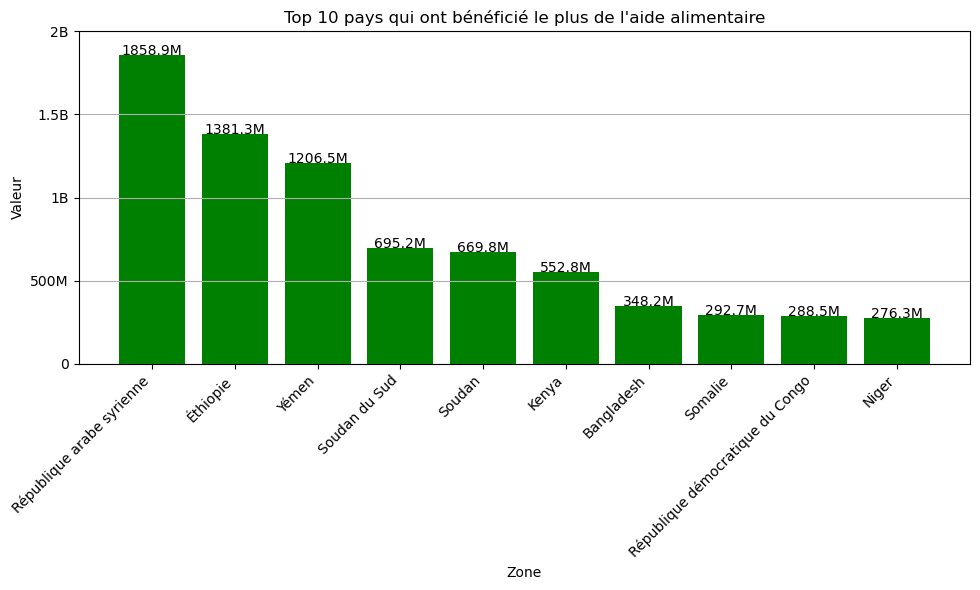

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(data_37['Zone'], data_37['Valeur'],color='Green')
plt.xlabel('Zone')
plt.ylabel('Valeur')
plt.grid(axis='y')
plt.ylim(0, 2000000000)

# Utilisation correcte de plt.yticks pour définir les positions et les étiquettes des marques.
plt.yticks([0, 500000000, 1000000000, 1500000000, 2000000000], ['0', '500M', '1B', '1.5B', '2B'])

plt.title("Top 10 pays qui ont bénéficié le plus de l'aide alimentaire")
plt.xticks(rotation=45, ha='right')

# Définition de la liste des valeurs (vérifiez que cette ligne existe et est correcte).
x = data_37['Valeur'].tolist()

# Création des annotations pour chaque barre.
for i, v in enumerate(x):
    value_in_millions= v/1000000
    plt.text(i, v + 2000, f'{value_in_millions:.1f}M', ha='center')

plt.tight_layout()
plt.show()


La République arabe syrienne et l'Éthiopie se distinguent avec les montants les plus importants, reflétant probablement les crises humanitaires ou les situations de sécheresse. 

D'autres pays comme le Yémen, le Soudan du Sud et le Soudan montrent également des montants considérables, indiquant un besoin significatif d'aide alimentaire. 

Les chiffres décroissent pour le Kenya, le Bangladesh, la Somalie, la République démocratique du Congo et le Niger, mais restent substantiels, soulignant une assistance continue.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [58]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire['Année'].unique()
aide_alimentaire_annee = aide_alimentaire.groupby(['Zone','Année'])['Valeur'].sum().reset_index()

In [59]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
pays= aide_alimentaire_pays.head(5).reset_index()
liste_pays= pays['Zone'].unique()

In [60]:
#On filtre sur le dataframe avec notre liste
filtered_data = aide_alimentaire_annee[aide_alimentaire_annee['Zone'].isin(liste_pays)]

In [61]:
# Affichage des pays avec l'aide alimentaire par année
print(filtered_data) 
filtered_data.info()

                          Zone  Année     Valeur
157  République arabe syrienne   2013  563566000
158  République arabe syrienne   2014  651870000
159  République arabe syrienne   2015  524949000
160  République arabe syrienne   2016  118558000
189                     Soudan   2013  330230000
190                     Soudan   2014  321904000
191                     Soudan   2015   17650000
192              Soudan du Sud   2013  196330000
193              Soudan du Sud   2014  450610000
194              Soudan du Sud   2015   48308000
214                      Yémen   2013  264764000
215                      Yémen   2014  103840000
216                      Yémen   2015  372306000
217                      Yémen   2016  465574000
225                   Éthiopie   2013  591404000
226                   Éthiopie   2014  586624000
227                   Éthiopie   2015  203266000
<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 157 to 227
Data columns (total 3 columns):
 #   Column  Non-N

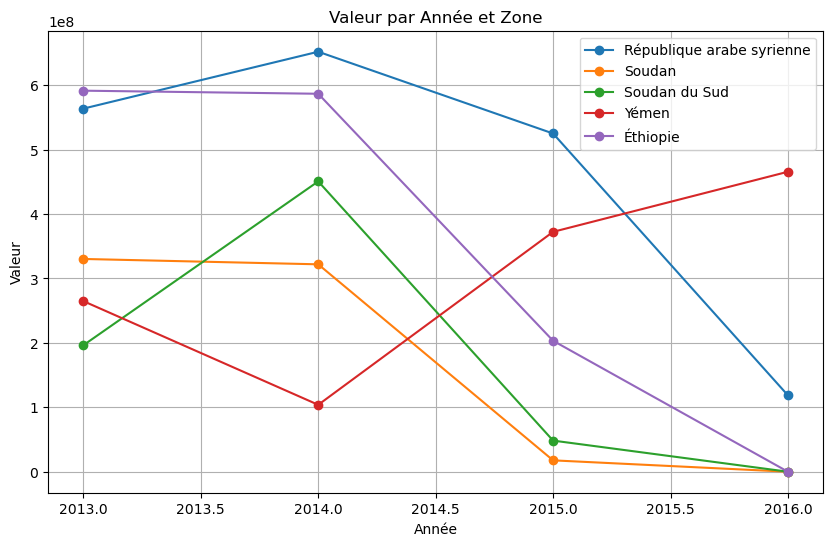

In [62]:
# Pivoter la DataFrame pour avoir les années en colonnes
pivot_df = filtered_data.pivot_table(index="Zone", columns="Année", values="Valeur", aggfunc='sum').fillna(0)

# Création du graphique
plt.figure(figsize=(10, 6))
for index, row in pivot_df.iterrows():
    plt.plot(row.index, row.values, marker='o', label=index)

plt.title('Valeur par Année et Zone')
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.legend()
plt.grid(True)
plt.show()

Le graphique montre l'évolution de l'aide alimentaire reçue par cinq pays de 2013 à 2016. L'aide à la Syrie a diminué régulièrement, tandis que celle au Yémen a fortement augmenté. Le Soudan du Sud a connu une chute significative après un pic en 2014. L'aide au Soudan et à l'Éthiopie a fluctué mais a terminé plus bas en 2016 qu'en 2013.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [63]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_alimentaire_zone= dispo_alimentaire.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().reset_index()
dispo_alimentaire_zone

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


In [64]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
moins_dispo_alimentaire_zone=dispo_alimentaire_zone.sort_values('Disponibilité alimentaire (Kcal/personne/jour)')
moins_dispo_alimentaire_zone.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


In [65]:
data_39=moins_dispo_alimentaire_zone.head(10)

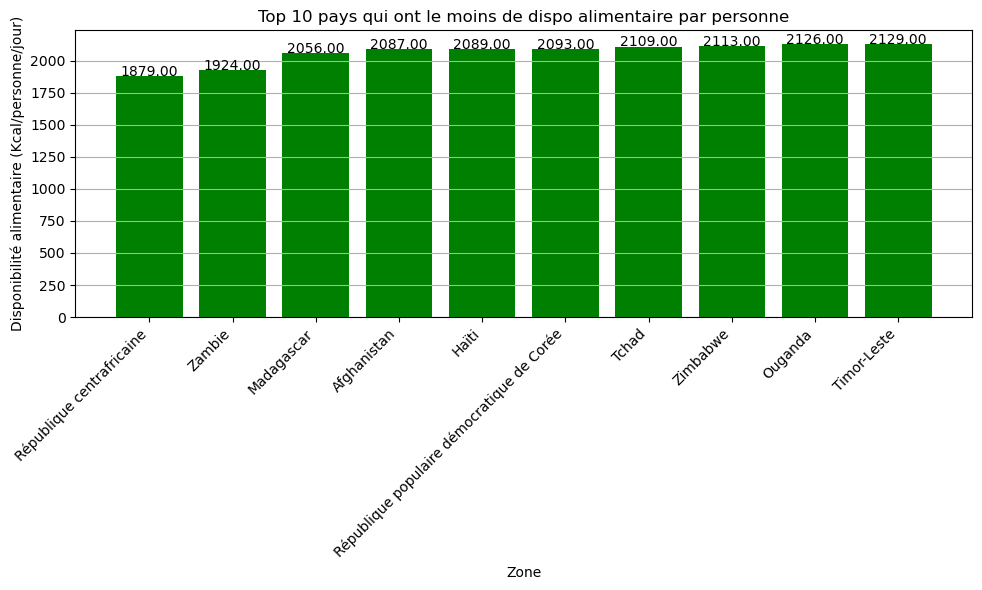

In [66]:
plt.figure(figsize=(10, 6))
plt.bar(data_39['Zone'],data_39['Disponibilité alimentaire (Kcal/personne/jour)'],color='Green')
plt.xlabel('Zone')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.grid(axis='y')
plt.title("Top 10 pays qui ont le moins de dispo alimentaire par personne")
plt.xticks(rotation=45, ha='right')

# Définition de la liste des valeurs (vérifiez que cette ligne existe et est correcte).
x = data_39['Disponibilité alimentaire (Kcal/personne/jour)'].tolist()

# Création des annotations pour chaque barre.
for i in range (len(x)):
    plt.text(i, x[i] + 0.5, f'{x[i]:.2f}', ha='center')
plt.tight_layout()
plt.show()

L’histogramme indique que malgré les défis alimentaires, tous les pays représentés ont une disponibilité alimentaire par personne et par jour supérieure à 1800 Kcal, ce qui est proche du seuil minimum recommandé par l'OMS, suggérant des problèmes liés moins à la quantité qu'à la qualité ou l'accès à la nourriture.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [67]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
plus_dispo_alimentaire_zone=dispo_alimentaire_zone.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False)
plus_dispo_alimentaire_zone.head(10)

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


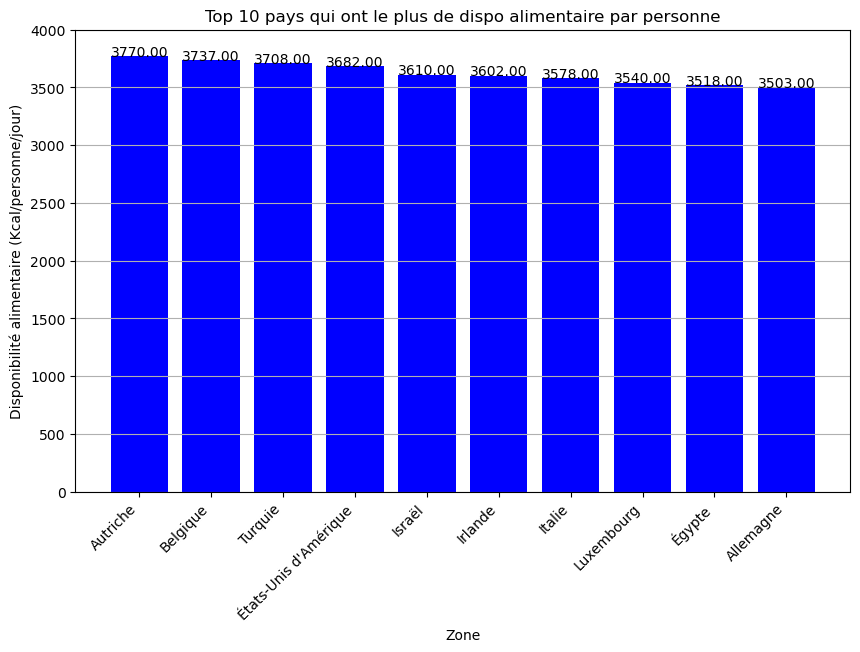

In [68]:
data_310= plus_dispo_alimentaire_zone.head(10)
plt.figure(figsize=(10, 6))
plt.bar(data_310['Zone'],data_310['Disponibilité alimentaire (Kcal/personne/jour)'],color='blue')
plt.xlabel('Zone')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title("Top 10 pays qui ont le plus de dispo alimentaire par personne")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.ylim(0,4000)

# Définition de la liste des valeurs (vérifiez que cette ligne existe et est correcte).
x = data_310['Disponibilité alimentaire (Kcal/personne/jour)'].tolist()

# Création des annotations pour chaque barre.
for i in range (len(x)):
    plt.text(i, x[i], f'{x[i]:.2f}', ha='center')

plt.show()

L’histogramme montre que tous les pays listés ont une disponibilité alimentaire par personne supérieure à la moyenne recommandée, soulignant une abondance de calories disponibles. 

Des valeurs allant de 3503 Kcal/personne/jour en Allemagne à 3770 Kcal/personne/jour en Autriche. 

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [69]:
#création d'un dataframe avec uniquement la Thaïlande
thailande= dispo_alimentaire[dispo_alimentaire['Zone']=='Thaïlande']
thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000.0,5000.0,33000.0,75000.0,0.0,45000.0,0.0,0.0,0.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000.0,6000.0,2000.0,6000.0,0.0,12000.0,0.0,2000.0,0.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000.0,0.0,0.00,0.00,0.00,358000.0,110000.0,21000.0,0.0,0.0,447000.0,0.0,0.0,0.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000.0,7000.0,19000.0,12000.0,0.0,0.0,0.0,0.0,0.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000.0,1449000.0,9000.0,671000.0,110000.0,2209000.0,0.0,0.0,13000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13849,Thaïlande,Viande de Suides,animale,0.0,0.0,124.0,13.00,11.83,3.92,871000.0,22000.0,1000.0,871000.0,0.0,891000.0,0.0,0.0,0.0
13850,Thaïlande,Viande de Volailles,animale,0.0,0.0,52.0,13.69,3.62,4.49,945000.0,536000.0,11000.0,917000.0,28000.0,1470000.0,0.0,0.0,0.0
13851,Thaïlande,"Viande, Autre",animale,0.0,0.0,0.0,0.03,0.01,0.02,-92000.0,96000.0,4000.0,2000.0,0.0,0.0,0.0,0.0,0.0
13852,Thaïlande,Vin,vegetale,0.0,0.0,0.0,0.12,0.00,0.00,8000.0,8000.0,16000.0,8000.0,0.0,0.0,0.0,0.0,0.0


In [70]:
manioc= thailande[thailande['Produit']=='Manioc']
manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40.0,13.0,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0


In [71]:
#Calcul de la sous nutrition en Thaïlande (propotition????)
sous_nutrition_thailande= data.loc[data['Zone']=='Thaïlande','proportion'].values[0]
print('Le propotition de la sous nutrition en Thaïlande: {} %'.format(sous_nutrition_thailande))

Le propotition de la sous nutrition en Thaïlande: 8.96 %


In [72]:
# On calcule la proportion exportée en fonction de la proportion (production)
proportion_manioc= round(manioc['Exportations - Quantité']/manioc['Production']*100,2)
proportion_manioc_value = proportion_manioc.values[0]
print('La proportion exportée en fonction de la production de manioc: {} %'.format(proportion_manioc_value))

La proportion exportée en fonction de la production de manioc: 83.41 %


La Thaïlande a un faible taux de sous_nutrition et une statégie d'exportation forte avec le manioc en tant que produit principal.Cela pourrait avoir des implications sur la stabilité du secteur agricole en cas de fluctuations sur le marché international.

La disponibilité de manioc intérieur est 6 264 000 kg. Cela peut indiquer une abondance de manioc par personne, ce qui pourrait contribuer à la sécurité alimentaire dans le pays.

La logique de la stratégie: la Thaïlande parvient à maintenir un équilibre entre l'exportation et la satisfaction des besoins alimentaires de sa population.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [73]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

In [74]:
dif_alimentaire= dispo_alimentaire.groupby('Zone').sum().reset_index()
data6=dif_alimentaire.sort_values('Disponibilité alimentaire (Kcal/personne/jour)')
data6=data6.head(6)
data6

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
128,République centrafricaine,"Abats ComestibleAlcool, non ComestibleAliments...",animalevegetalevegetalevegetalevegetalevegetal...,1000.0,27000.0,1879.0,453.73,59.41,46.04,2582000.0,0.0,76000.0,2092000.0,122000.0,2503000.0,63000.0,278000.0,3000.0
166,Zambie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetalevegetal...,408000.0,69000.0,1924.0,350.12,42.05,55.22,10041000.0,675000.0,380000.0,5088000.0,242000.0,10526000.0,76000.0,4178000.0,-182000.0
91,Madagascar,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,842000.0,2522000.0,2056.0,425.07,24.49,46.69,15216000.0,236000.0,924000.0,9741000.0,966000.0,14160000.0,375000.0,844000.0,375000.0
0,Afghanistan,"Abats ComestibleAgrumes, AutresAliments pour e...",animalevegetalevegetalevegetalevegetaleanimale...,768000.0,415000.0,2087.0,351.41,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0
65,Haïti,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,481000.0,115000.0,2089.0,397.78,48.92,47.70,6175000.0,15000.0,1204000.0,4101000.0,679000.0,5072000.0,36000.0,762000.0,-77000.0
133,République populaire démocratique de Corée,Abats ComestibleAnimaux Aquatiques AutreAvoine...,animaleanimalevegetaleanimalevegetalevegetalev...,816000.0,695000.0,2093.0,458.93,36.41,54.99,14876000.0,83000.0,993000.0,11425000.0,1066000.0,13883000.0,194000.0,678000.0,84000.0


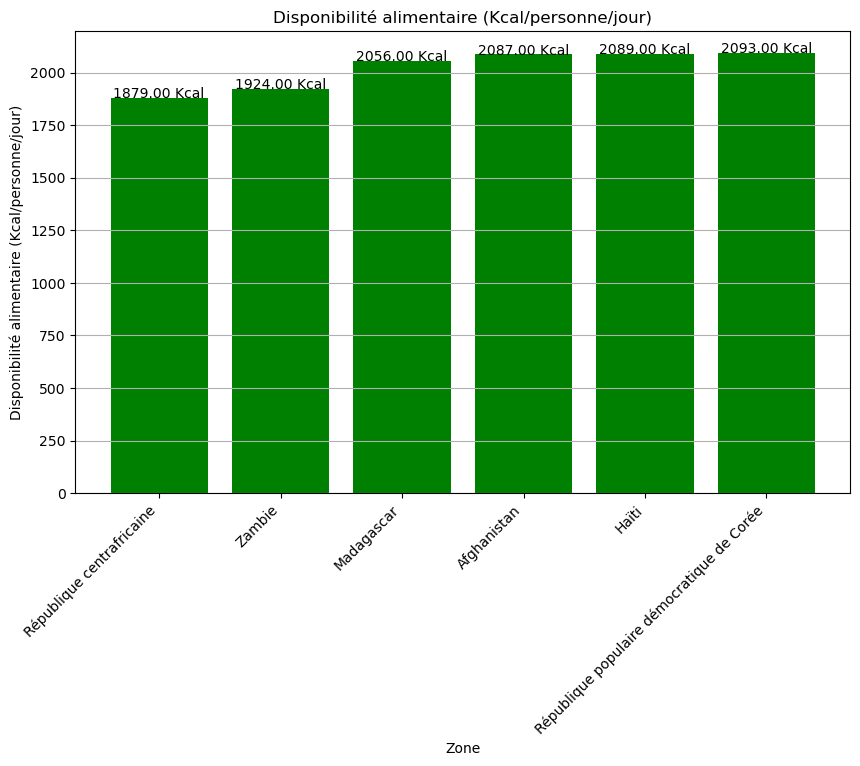

In [75]:
#Histogrammes des Disponibilité alimentaire
plt.figure(figsize=(10, 6))
plt.bar(data6['Zone'],data6['Disponibilité alimentaire (Kcal/personne/jour)'],color='green')
plt.xlabel('Zone')
plt.ylabel('Disponibilité alimentaire (Kcal/personne/jour)')
plt.title("Disponibilité alimentaire (Kcal/personne/jour)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Définition de la liste des valeurs (vérifiez que cette ligne existe et est correcte).
x = data6['Disponibilité alimentaire (Kcal/personne/jour)'].tolist()

# Création des annotations pour chaque barre.
for i in range (len(x)):
    plt.text(i, x[i], f'{x[i]:.2f} Kcal', ha='center')

plt.show()

L’histogramme indique que malgré les défis alimentaires, tous les pays représentés ont une disponibilité alimentaire par personne et par jour supérieure à 1800 Kcal.

In [76]:
#Les taux de pertes 
data6['taux_perte']= round(data6['Pertes']/data6['Disponibilité intérieure']*100,2)
data6['taux_importation']= round(data6['Importations - Quantité']/data6['Disponibilité intérieure']*100,2)
data6

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,taux_perte,taux_importation
128,République centrafricaine,"Abats ComestibleAlcool, non ComestibleAliments...",animalevegetalevegetalevegetalevegetalevegetal...,1000.0,27000.0,1879.0,453.73,59.41,46.04,2582000.0,0.0,76000.0,2092000.0,122000.0,2503000.0,63000.0,278000.0,3000.0,4.73,2.94
166,Zambie,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetalevegetal...,408000.0,69000.0,1924.0,350.12,42.05,55.22,10041000.0,675000.0,380000.0,5088000.0,242000.0,10526000.0,76000.0,4178000.0,-182000.0,2.41,3.78
91,Madagascar,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,842000.0,2522000.0,2056.0,425.07,24.49,46.69,15216000.0,236000.0,924000.0,9741000.0,966000.0,14160000.0,375000.0,844000.0,375000.0,6.35,6.07
0,Afghanistan,"Abats ComestibleAgrumes, AutresAliments pour e...",animalevegetalevegetalevegetalevegetaleanimale...,768000.0,415000.0,2087.0,351.41,33.50,58.26,13515000.0,278000.0,2988000.0,10735000.0,1135000.0,11171000.0,395000.0,63000.0,-368000.0,8.40,22.11
65,Haïti,"Abats ComestibleAgrumes, AutresAlcool, non Com...",animalevegetalevegetalevegetalevegetaleanimale...,481000.0,115000.0,2089.0,397.78,48.92,47.70,6175000.0,15000.0,1204000.0,4101000.0,679000.0,5072000.0,36000.0,762000.0,-77000.0,11.00,19.50
133,République populaire démocratique de Corée,Abats ComestibleAnimaux Aquatiques AutreAvoine...,animaleanimalevegetaleanimalevegetalevegetalev...,816000.0,695000.0,2093.0,458.93,36.41,54.99,14876000.0,83000.0,993000.0,11425000.0,1066000.0,13883000.0,194000.0,678000.0,84000.0,7.17,6.68


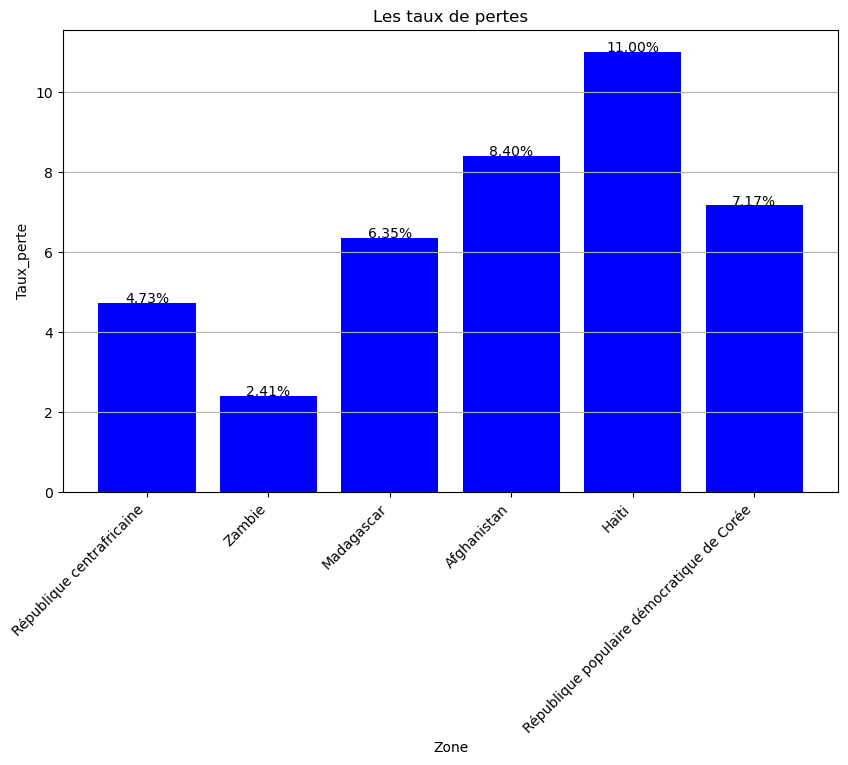

In [77]:
#Histogrammes des taux_pertes
plt.figure(figsize=(10, 6))
plt.bar(data6['Zone'],data6['taux_perte'],color='blue')
plt.xlabel('Zone')
plt.ylabel('Taux_perte')
plt.title("Les taux de pertes")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Définition de la liste des valeurs (vérifiez que cette ligne existe et est correcte).
x = data6['taux_perte'].tolist()

# Création des annotations pour chaque barre.
for i in range (len(x)):
    plt.text(i, x[i], f'{x[i]:.2f}%', ha='center')

plt.show()

Cet histogramme illustre les taux de pertes post-récolte pour différents pays. 

La Haïti populaire démocratique de Corée a le taux le plus élevé à 11%, ce qui pourrait indiquer des problèmes dans la gestion après récolte. Les taux pour les autres pays varient, avec La République populaire démocratique de Corée également affichant un taux relativement élevé à 7.17%. 

Les différences dans ces taux pourraient refléter l'efficacité des systèmes de stockage et de transport de chaque pays, ainsi que les technologies de conservation utilisées.

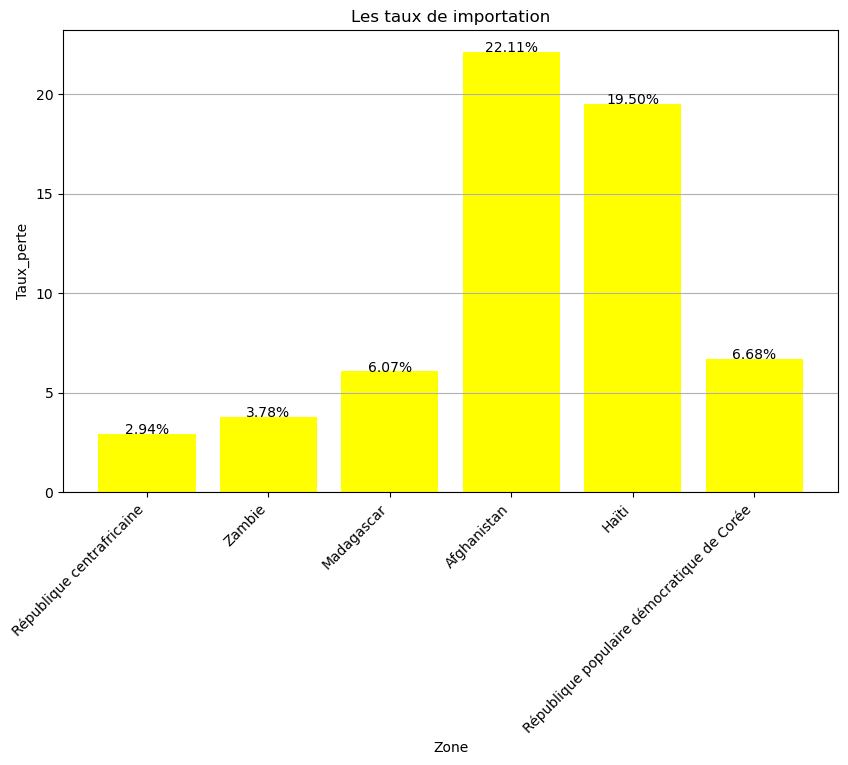

In [78]:
#Histogrammes des taux_importation
plt.figure(figsize=(10, 6))
plt.bar(data6['Zone'],data6['taux_importation'],color='yellow')
plt.xlabel('Zone')
plt.ylabel('Taux_perte')
plt.title("Les taux de importation")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Définition de la liste des valeurs (vérifiez que cette ligne existe et est correcte).
x = data6['taux_importation'].tolist()

# Création des annotations pour chaque barre.
for i in range (len(x)):
    plt.text(i, x[i], f'{x[i]:.2f}%', ha='center')

plt.show()

L'histogramme indique que l'Afghanistan et Haïti sont particulièrement dépendants des importations alimentaires, avec respectivement 22.11% et 19.50%. 

Cela souligne leur vulnérabilité face à la volatilité du marché international et aux crises alimentaires potentielles. Les autres pays présentent des taux plus faibles, mais toute dépendance suggère une précarité en sécurité alimentaire.